# Лабораторная работа №2
**Вариант №22**

In [1]:
import numpy as np
from numpy import abs, sqrt, sin, cos
from matplotlib import pyplot as plt 

## Задача 2.1 
### Постановка задачи
Методом простой итерации найти  вещественные корни нелинейного уравнения  $f(𝑥)=0$ с точностью $\varepsilon = 10^{-8}$.

$f(x) = x^3 - 0.9x^2 - x - 0.1$


1. Построим график функции и определим отрезки локализации для каждого корня.

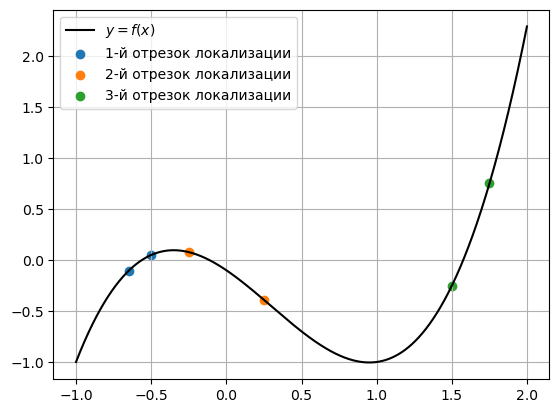

In [2]:
f = lambda x: x**3 - 0.9 * x**2 - x - 0.1
df = lambda x: 3 * x ** 2  - 1.8 * x - 1
# phi = lambda x: x**3 - 0.9 * x ** 2 - 0.1
# dphi = lambda x:  3 * x ** 2  - 1.8 * x

eps = 10**(-8)
x = np.arange(-1, 2, 0.001)
seg1 = np.array([-0.65, -0.5])
seg2 = np.array([-0.25, 0.25])
seg3 = np.array([1.5, 1.75])
plt.plot(x, f(x), "k", label="$y = f(x)$")
# plt.plot(x, x, "r", label="$y = x$")
plt.scatter(seg1, f(seg1), label=f"1-й отрезок локализации")
plt.scatter(seg2, f(seg2), label=f"2-й отрезок локализации")
plt.scatter(seg3, f(seg3), label=f"3-й отрезок локализации")
plt.legend()
plt.grid()

 2. Определим производную $f(x)$:

$f'(x) = 3x^2 - 1.8 x - 1$.

Построим график производной и отметим на нём границы отрезков локализации:

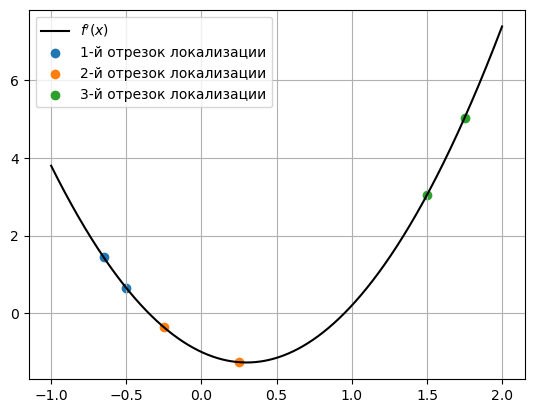

In [3]:
plt.plot(x, df(x), "k", label="$f'(x)$")
plt.scatter(seg1, df(seg1), label=f"1-й отрезок локализации")
plt.scatter(seg2, df(seg2), label=f"2-й отрезок локализации")
plt.scatter(seg3, df(seg3), label=f"3-й отрезок локализации")

plt.grid()
plt.legend()

Из графика видно, что на отрезках локализации производная функции сохраняет постоянный знак.

3. Для каждого корня определим итерационный параметр $\alpha$ и параметр $q$, используя формулы:

$\alpha = \dfrac{2}{M1 + m1}$

$q = \left| \dfrac{M1 - m1}{M1 + m1} \right|$

где $M1=\max_\limits{x\in [a,b]} f'(x),\ m1 = \min_\limits{x\in [a,b]}f'(x)$

In [4]:
# Минимумы и максимумы выбраны приближенно на основе графика
M1 = np.array([df(seg1[0]), df(seg2[0]), df(seg3[1])])
m1 = np.array([df(seg1[1]), df(seg2[1]), df(seg3[0])])
alpha = 2 / (M1 + m1)
Q = np.abs((M1 - m1) / (M1 + m1))
x0 = np.array([seg1[0], seg2[0], seg3[0]])
alpha, df(x0), M1, Q

(array([ 0.95808383, -1.23076923,  0.24729521]),
 array([ 1.4375, -0.3625,  3.05  ]),
 array([ 1.4375, -0.3625,  5.0375]),
 array([0.37724551, 0.55384615, 0.24574961]))

In [6]:
def MPI(x0, alpha, q, f, eps):
    x1 = x0 - alpha * f(x0)
    it = 1
    while abs(x1 - x0) > (1 - q) * eps / q:
        x0, x1 = x1, x1 - alpha * f(x1)
        it += 1
    print(f"Выполнено {it} итераций")
    return x1
roots = [MPI(start, a, q, f, eps) for start, a, q in zip(x0, alpha, Q)]
roots = np.array(roots)
print("Корни: ", *roots)

Выполнено 8 итераций
Выполнено 8 итераций
Выполнено 8 итераций
Корни:  -0.562245967356848 -0.11291428972518679 1.5751602543945673


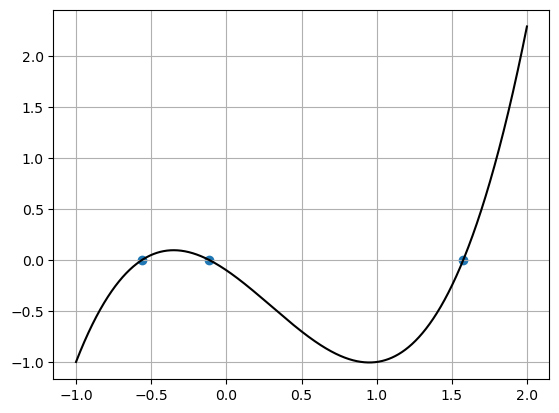

In [7]:
plt.plot(x, f(x), "k", label="$f(x)$")
plt.scatter(roots, f(roots))
plt.grid()

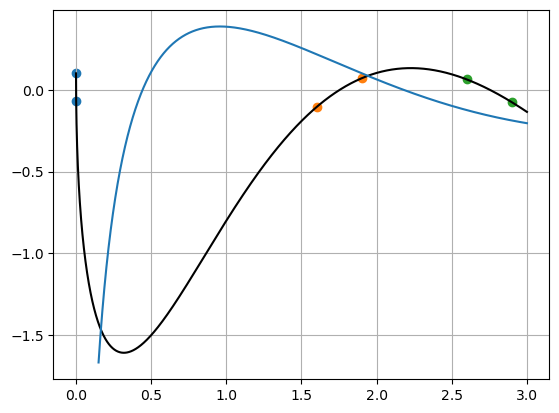

	0.0004039414175664812
	0.0002992864260486051
	0.00037068001309988204
	0.0003248241806726222
	0.0003558397589685898
	0.0003354276229367201
	0.00034914067442149105
	0.0003400426644608822
	0.0003461323048583045
	0.00034207927772305854
	0.00034478727921752566
	0.00034298253417900976
	0.00034418736680540444
	0.00034338394224940117
	0.00034392010139128133
	0.00034356248059150377
	0.0003438010960825013
	0.00034364192040563175
	0.0003437481193217611
	0.00034367727257331014
	0.00034372453857020645
	0.0003436930060749106
	0.0003437140429287755
	0.00034370000850411094
	0.00034370937148620913
	0.00034370312508418097
	0.0003437072923215028
	0.0003437045121932818
	0.0003437063669312342
	0.00034370512956138135
	0.00034370595506125234
	0.00034370540433706554
	0.00034370577174752724
	0.00034370552663317785
	0.0003437056901588913
	0.00034370558106427973
	0.0003437056538457107
	0.00034370560529027534
	0.0003437056376835712
	0.0003437056160726935
	0.00034370563049018483
	0.0003437056208716921
	0.00034370

/tmp/ipykernel_1190379/2989770896.py:1: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: 10**(-np.sqrt(x)) - np.sin(np.pi * np.sqrt(x)) - 0.9
/tmp/ipykernel_1190379/2989770896.py:2: RuntimeWarning: invalid value encountered in sqrt
  f_der = lambda x: -1/(2 * np.sqrt(x)) * (np.log(10) * 10 ** (-np.sqrt(x)) + np.cos(np.pi * np.sqrt(x)))


[0.000343705624381374, nan, nan]

## Задача 2.3